# <div style="text-align: center;"><b><span style='color:#e61227'>|</span> Convolutional Neural Network for Pneumonia Diagnosis (Keras)<span style='color:#e61227'>|</span></b></div>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>1. </span></b> What is Pneumonia?</b></p>
</div>

Pneumonia is a respiratory infection that inflames the air sacs in one or both lungs, causing them to fill with fluid or pus. This can lead to symptoms such as cough, fever, difficulty breathing, and chest pain. Pneumonia can be caused by various infectious agents, including bacteria, viruses, and fungi, and can range from mild to severe, with potentially life-threatening complications in certain cases.

![](https://d2jx2rerrg6sh3.cloudfront.net/image-handler/ts/20200610065811/ri/1000/picture/2020/6/shutterstock_1062330374.jpg)

## <b>1.1 <span style='color:#e61227'>|</span> Diagnosis</b>

The diagnosis of pneumonia typically involves a combination of medical history, physical examination, and diagnostic tests. Your doctor will begin by asking about your symptoms and medical history, including any recent illnesses or exposure to infectious agents. During the physical exam, your doctor may listen to your lungs with a stethoscope to check for abnormal sounds such as crackling or bubbling, which can indicate pneumonia.

In addition to the physical exam, your doctor may recommend the following diagnostic tests:

- **Chest X-ray**: This imaging test allows your doctor to visualize the lungs and identify any abnormalities suggestive of pneumonia, such as inflammation, fluid accumulation, or lung consolidation.
- **Blood tests**: Blood tests can help confirm the presence of infection and may be used to identify the specific organism causing pneumonia, although precise identification is not always possible.
- **Pulse oximetry**: This non-invasive test measures the oxygen level in your blood, which can be affected by pneumonia-induced lung inflammation.
- **Sputum test**: A sample of fluid from your lungs (sputum) may be collected and analyzed to help identify the causative organism and guide treatment decisions.

## <b>1.2 <span style='color:#e61227'>|</span> Treatment</b>

Treatment for pneumonia aims to cure the infection and alleviate symptoms while preventing complications. The specific treatment approach will depend on several factors, including the type and severity of pneumonia, your age, and overall health status. Common treatment options include:

- **Antibiotics**: Antibiotics are used to treat bacterial pneumonia, and the choice of antibiotic will depend on factors such as the suspected organism and antibiotic resistance patterns. If pneumonia is caused by a virus or fungus, antiviral or antifungal medications may be prescribed instead.
- **Supportive care**: Supportive measures such as rest, hydration, and fever management may help alleviate symptoms and promote recovery. In some cases, supplemental oxygen therapy may be needed to ensure adequate oxygenation of the blood.
- **Hospitalization**: Severe cases of pneumonia, particularly those involving complications such as respiratory failure or sepsis, may require hospitalization for close monitoring and intensive treatment, including intravenous antibiotics and respiratory support.

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>1. </span></b> Import Libraries</b></p>
</div>

In [1]:
# Import essential libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import plotly.express as px
from sklearn.metrics import roc_curve
import random
import tensorflow as tf
import numpy as np

# Set random seed for NumPy
np.random.seed(35753)
# Set random seed for Python random module
random.seed(5754)
# Set random seed for TensorFlow
tf.random.set_seed(1243)

2024-05-06 03:47:33.781852: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-06 03:47:33.781987: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-06 03:47:33.933240: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>2. </span></b> Data Preparation and Visualization</b></p>
</div>

### <b>2.1. <span style='color:#e61227'>|</span> Transformation</b> 

In [2]:
image_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    samplewise_center=True,
    samplewise_std_normalization=True
)

### <b>2.2. <span style='color:#e61227'>|</span> Define Train, Validation, and Test datasets</b> 

In [3]:
train_dir = "/kaggle/input/chest-xray-pneumonia/chest_xray/train"
val_dir = "/kaggle/input/chest-xray-pneumonia/chest_xray/val"
test_dir = "/kaggle/input/chest-xray-pneumonia/chest_xray/test"

In [4]:
train = image_generator.flow_from_directory(train_dir, 
                                            batch_size=8, 
                                            shuffle=True, 
                                            class_mode='binary',
                                            target_size=(180, 180))

validation = image_generator.flow_from_directory(val_dir, 
                                                batch_size=1, 
                                                shuffle=False, 
                                                class_mode='binary',
                                                target_size=(180, 180))

test = image_generator.flow_from_directory(test_dir, 
                                            batch_size=1, 
                                            shuffle=False, 
                                            class_mode='binary',
                                            target_size=(180, 180))

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


### <b>2.3. <span style='color:#e61227'>|</span> Visualizing Some Random Images</b> 

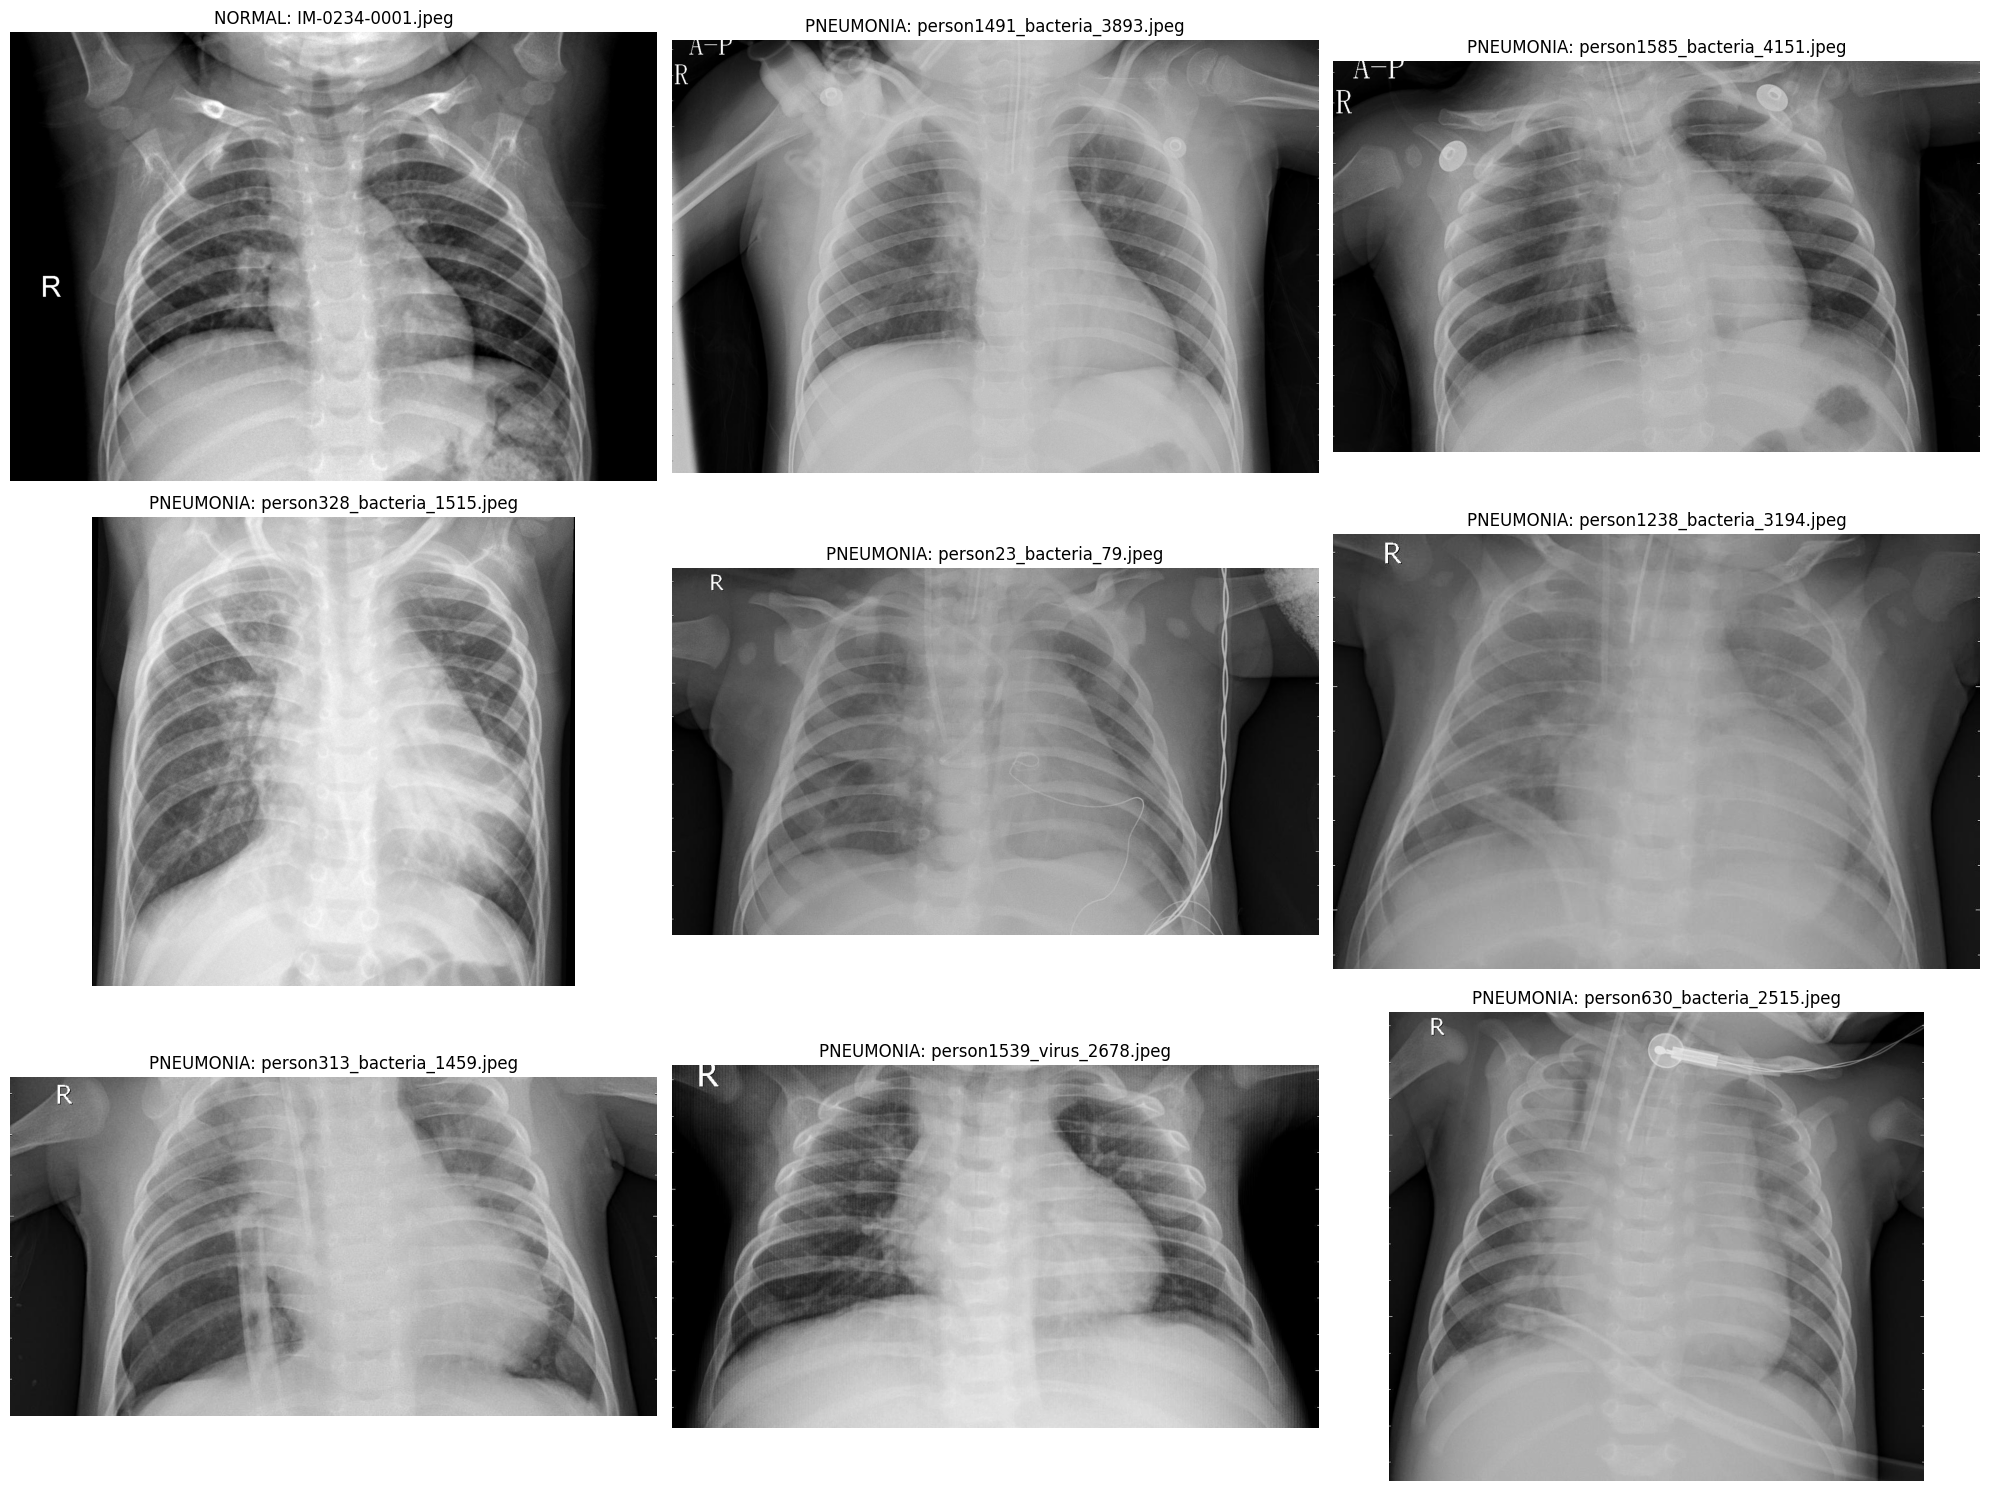

In [5]:
# Define the path to the NORMAL class directory
NORMAL_class_path = os.path.join(train_dir, "NORMAL")
normal_images = os.listdir(NORMAL_class_path)

# Define the path to the PNEUMONIA class directory
PNEUMONIA_class_path = os.path.join(train_dir, "PNEUMONIA")
pneumonia_images = os.listdir(PNEUMONIA_class_path)

# Randomly select images from both classes
random_images = random.sample(normal_images + pneumonia_images, 9)

# Create a figure with 9 subplots
plt.figure(figsize=(20, 15))

# Plot the randomly selected images
for i in range(9):
    plt.subplot(3, 3, i + 1)
    if random_images[i] in normal_images:
        img_path = os.path.join(NORMAL_class_path, random_images[i])
        class_label = 'NORMAL'
    else:
        img_path = os.path.join(PNEUMONIA_class_path, random_images[i])
        class_label = 'PNEUMONIA'
    img = plt.imread(img_path)
    plt.imshow(img, cmap='gray')
    plt.title(f'{class_label}: {random_images[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

### <b>2.4. <span style='color:#e61227'>|</span> Classes Weights</b> 

In [6]:
num_pneumonia = len(os.listdir(os.path.join(train_dir, 'PNEUMONIA')))
num_normal = len(os.listdir(os.path.join(train_dir, 'NORMAL')))

In [7]:
# Class weights

weight_for_0 = num_pneumonia / (num_normal + num_pneumonia)
weight_for_1 = num_normal / (num_normal + num_pneumonia)

class_weight = {0: weight_for_0, 1: weight_for_1}

print(f"Weight for class 0: {weight_for_0:.2f}")
print(f"Weight for class 1: {weight_for_1:.2f}")

Weight for class 0: 0.74
Weight for class 1: 0.26


<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>3. </span></b> Training Model</b></p>
</div>

In [8]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(180, 180, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(180, 180, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 178, 178, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 176, 176, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 176, 176, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 88, 88, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 86, 86, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 86, 86, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 84, 84, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 84, 84, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 42, 42, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 40, 40, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 40, 40, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 38, 38, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 38, 38, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 19, 19, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 46208)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     5,914,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,203,681 (23.67 MB)

 Trainable params: 6,202,785 (23.66 MB)

 Non-trainable params: 896 (3.50 KB)

In [10]:
r = model.fit(
    train, 
    epochs=8,
    validation_data=validation, 
    class_weight=class_weight,
    steps_per_epoch=100,
    validation_steps=25,
)

Epoch 1/8


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 102s 946ms/step - accuracy: 0.7790 - loss: 1.4842 - val_accuracy: 0.5000 - val_loss: 23.6068
Epoch 2/8


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 93s 925ms/step - accuracy: 0.8319 - loss: 0.5600 - val_accuracy: 0.5000 - val_loss: 54.5334
Epoch 3/8
100/100 ━━━━━━━━━━━━━━━━━━━━ 95s 951ms/step - accuracy: 0.8859 - loss: 0.1830 - val_accuracy: 0.5625 - val_loss: 14.8114
Epoch 4/8
100/100 ━━━━━━━━━━━━━━━━━━━━ 93s 931ms/step - accuracy: 0.8382 - loss: 0.2124 - val_accuracy: 0.5625 - val_loss: 2.0269
Epoch 5/8
100/100 ━━━━━━━━━━━━━━━━━━━━ 92s 921ms/step - accuracy: 0.7981 - loss: 0.1733 - val_accuracy: 0.6250 - val_loss: 4.0718
Epoch 6/8
100/100 ━━━━━━━━━━━━━━━━━━━━ 95s 946ms/step - accuracy: 0.8564 - loss: 0.0992 - val_accuracy: 0.6250 - val_loss: 20.6433
Epoch 7/8
100/100 ━━━━━━━━━━━━━━━━━━━━ 49s 485ms/step - accuracy: 0.8516 - loss: 0.1180 - val_accuracy: 0.5000 - val_loss: 1.9924
Epoch 8/8
100/100 ━━━━━━━━━━━━━━━━━━━━ 93s 917ms/step - accuracy: 0.9210 - loss: 0.0777 - val_accuracy: 0.7500 - val_loss: 0.5317


<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>4. </span></b> Confusion Matrix and ROC</b></p>
</div>

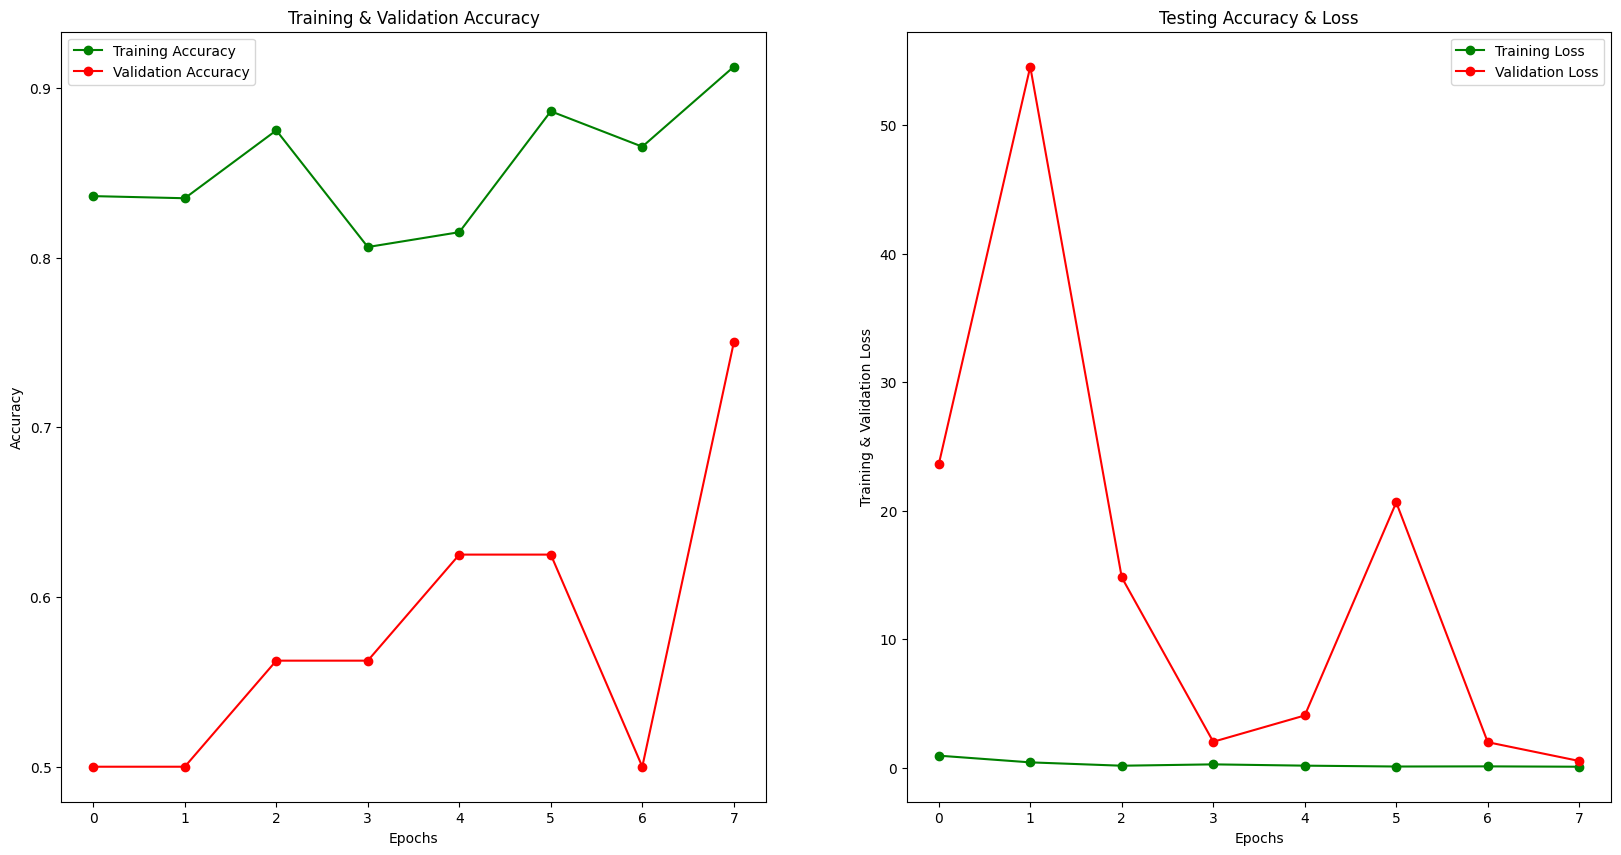

In [11]:
epochs = [i for i in range(8)]
fig , ax = plt.subplots(1,2)
train_acc = r.history['accuracy']
train_loss = r.history['loss']
val_acc = r.history['val_accuracy']
val_loss = r.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [12]:
# Evaluation on Test Set
evaluation_test = model.evaluate(test)
test_accuracy = evaluation_test[1] * 100
print("Test Accuracy: {:.2f}%".format(test_accuracy))

# Evaluation on Train Set
evaluation_train = model.evaluate(train)
train_accuracy = evaluation_train[1] * 100
print("Train Accuracy: {:.2f}%".format(train_accuracy))

624/624 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.8482 - loss: 0.4143
Test Accuracy: 81.41%
652/652 ━━━━━━━━━━━━━━━━━━━━ 175s 269ms/step - accuracy: 0.8386 - loss: 0.3392
Train Accuracy: 82.86%


In [13]:
pred = model.predict(test)

conf_matrix = confusion_matrix(test.classes, pred > 0.5)

624/624 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step


In [14]:
fig = px.imshow(conf_matrix,
                labels=dict(x="Predicted Values", y="Actual Values", color="Values"),
                x=["Negative (0)", "Positive (1)"],
                y=["Negative (0)", "Positive (1)"],
                color_continuous_scale='Blues',  # Adjust color scale if needed
                width=600, height=600,
                text_auto=True,
                title="Confusion Matrix")

fig.update_xaxes(side="top")
fig.show()

In [15]:
pd.DataFrame(classification_report(test.classes, pred > 0.5, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.712766,0.903509,0.817308,0.808137,0.831980
recall,0.858974,0.792308,0.817308,0.825641,0.817308
f1-score,0.779070,0.844262,0.817308,0.811666,0.819815
support,234.000000,390.000000,0.817308,624.000000,624.000000


In [16]:
FPR, TPR, thresholds = roc_curve(test.classes, pred.reshape(-1, 1))
roc_data = pd.DataFrame({
    'FPR': FPR,
    'TPR': TPR
})
fig = px.line(roc_data, x='FPR', y='TPR',
              title='ROC curve for MM 2024',
              labels={'FPR': 'False positive rate (1-Specificity)', 'TPR': 'True positive rate (Sensitivity)'},
              width=500, height=500)
fig.show()